In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Connecting to the Colab

In [2]:
cd 'gdrive'/'My Drive'/'Valital'/'Clustering' 

/content/gdrive/My Drive/Valital/Clustering


In [3]:
ls

Clustering_tf_idf.ipynb          english_label_data.csv
Clustering_using_word2vec.ipynb  english_oneclass_testset.csv
english_category_textset.csv     french_label_data.csv


## Clustering 

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.We use clustering analysis to gain some valuable insights from our data by seeing what groups the data points fall into when we apply a clustering algorithm.

In [4]:
import string 
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.corpus.reader import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Preprocessing data functions

In this we will preprocess content column(i.e which contains the text). Below are the preprocessing steps which we are implement.

*   Convert into lower case
*   Remove punctuation and special character
*   Remove tokens that are not alphabetic and lemmatize based on pos tag
*   Remove stopwords

In [0]:
def get_wordnet_pos(word: str) -> str:
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [0]:
def preprocess(text: str) -> str:
    # convert into lower case
    tokens = [w.lower() for w in nltk.word_tokenize(text)]
    # remove punctuation and special character
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic and lemmatize based on pos tag
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in stripped if word.isalpha()]
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return ' '.join(words)

## K-means clustering

It is one of the simplest and popular unsupervised machine learning algorithms. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.” A cluster refers to a collection of data points aggregated together because of certain similarities

Kmean_clustering function takes in the below parameters

*   content :- Text data
*   k:-  Number of clusters
*   en_stop :- English stopwords

Below are the task which is performed by the Kmean_clustering function

*   Feature Engineering :- It implements the tf_idf Vectorization.
*   Defining the parameter of the model
*   Training the model on the data(Model fitting)
*   Print the clusters most representative words for that cluster center 

In [0]:
def Kmean_clustering(k,content,stopwords):

  # Feature Engineering
  vectorizer = TfidfVectorizer(stop_words = stopwords)
  X = vectorizer.fit_transform(content)
  
  # defining the parameter of the model
  true_k = k
  model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
  # Training the model on the data(Model fitting)
  model.fit(X)

  order_centroids = model.cluster_centers_.argsort()[:, ::-1]
  terms = vectorizer.get_feature_names()

  for i in range(true_k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :20]:
      print(' %s' % terms[ind])

## TNSE Visualization functions

In [0]:
def tnse_projection(content,labels,stopwords):
  # Load the data and create document vectors
  tfidf  = TfidfVectorizer(stop_words = stopwords)

  docs = tfidf.fit_transform(content)
  tags = labels

  # Create the visualizer and draw the vectors
  tsne = TSNEVisualizer()
  tsne.fit(docs, tags)
  tsne.poof()

## Clustering on english corpus

Firstly we would read the file which contains the english corpus

In [0]:
df_english= pd.read_csv('english_label_data.csv')

#### Prepocess english corpus



In [0]:
df_english['content'] = df_english['content'].apply(preprocess)

#### Set parameters for the model.

In [0]:
k = 6
content = df_english['content']

#### Feature engineering and model fitting 


In [12]:
Kmean_clustering(k,content,en_stop)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Cluster 0:
 fraud
 mr
 company
 bank
 charge
 million
 investor
 prosecutor
 sec
 security
 federal
 case
 financial
 court
 money
 fund
 scheme
 credit
 state
 firm
Cluster 1:
 mr
 harassment
 sexual
 woman
 weinstein
 fox
 allegation
 advertisement
 cain
 lawyer
 company
 news
 employee
 ailes
 complaint
 settlement
 reilly
 case
 lopez
 time
Cluster 2:
 trump
 president
 republican
 voter
 vote
 house
 white
 kavanaugh
 election
 democrat
 state
 nt
 woman
 senate
 court
 right
 bill
 people
 american
 law
Cluster 3:
 woman
 nt
 people
 year
 company
 time
 world
 new
 like
 game
 work
 state
 child
 sexual
 team
 use
 cnn
 come
 day
 report
Cluster 4:
 violence
 police
 gun
 kill
 mr
 domestic
 people
 officer
 city
 school
 woman
 attack
 report
 victim
 crime
 advertisement
 state
 law
 year
 shoot
Cluster 5:
 drug
 opioid
 addiction
 treatment
 heroin
 prescription
 addict
 opioids
 use
 health
 overdose
 abuse
 patient
 death
 marijuana
 epidemic
 people
 study
 pain
 dr


#### Visualizating categorical english cluster

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'

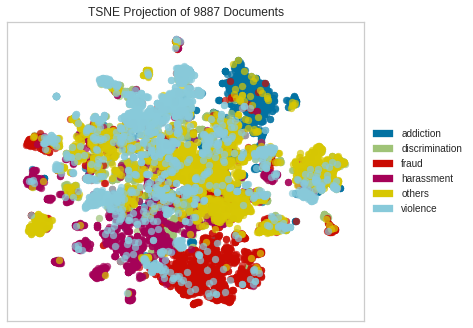

In [13]:
  # visualizing one class clustering where k=6
  content = df_english['content'].values
  labels = df_english['human_content_category_1'].values
  tnse_projection(content,labels,en_stop)

#### Visualizating one class english cluster

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


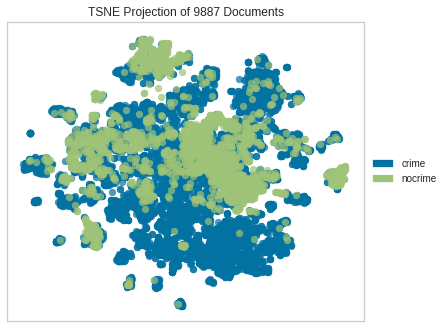

In [14]:
# visualizing one class clustering where k=2
content = df_english['content'].values
labels = df_english['human_content_oneclass_category_1'].values
tnse_projection(content,labels,en_stop)

## Clustering on French corpus

we would read the file which contains the french corpus and preprocess it.

In [0]:
df_french= pd.read_csv('french_label_data.csv')

#### Prepocess english corpus

In [0]:
df_french['content'] = df_french['content'].apply(preprocess)

#### Set parameters for the model.

In [0]:
k = 2
content = df_french['content']

#### Feature engineering and model fitting 

In [18]:
Kmean_clustering(k,content,fr_stop)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', 'quelqu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Cluster 0:
 qu
 pa
 ministre
 femmes
 police
 violence
 gouvernement
 accusation
 québec
 hier
 enquête
 personnes
 pay
 harcèlement
 président
 chef
 victimes
 loi
 justice
 policiers
Cluster 1:
 pa
 qu
 sport
 cest
 match
 jeux
 monde
 faire
 québec
 montréal
 équipe
 joueurs
 saison
 fois
 temp
 santé
 vie
 grand
 hockey
 canada


#### Visualizating categorical french cluster

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', 'quelqu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' &

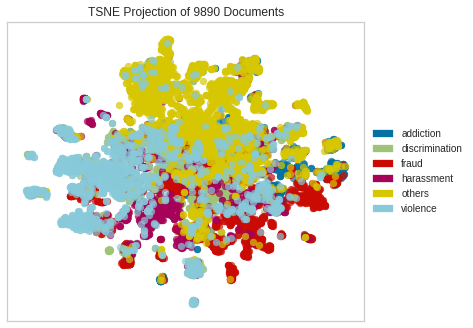

In [19]:
content = df_french['content'].values
labels = df_french['human_content_category_1'].values
tnse_projection(content,labels,fr_stop)

#### Visualizating one class french cluster

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', 'quelqu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


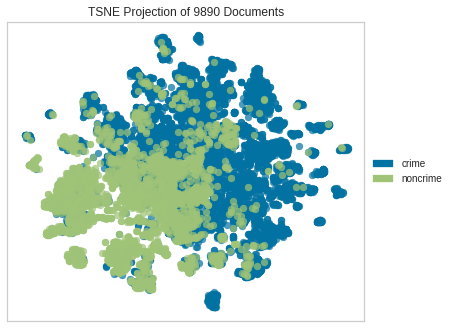

In [20]:
content = df_french['content'].values
labels = df_french['human_content_oneclass_category_1'].values
tnse_projection(content,labels,fr_stop)